In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem Statement: Predicting Molecular Mutagenicity Using kNN for SPR Modeling

In [515]:
# Reading the dataset from csv file
file = pd.read_csv('mutagenicity_kNN.csv')

In [516]:
file

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,5759,5767,20395-16-8,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,5760,5768,34718-47-3,O=C(C(Br)(Br)Br)Cl,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,5761,5769,43204-63-3,N(CCBr)CCBr,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,5762,5770,52583-35-4,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


## Data Preprocessing: EDA

In [517]:
file.columns

Index(['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Experimental value',
       'Predicted value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')

In [518]:
file = file.drop(columns=['Unnamed: 0','Id'])

In [519]:
file.head()

,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [520]:
file['Status'].value_counts() 

Status
Training    5764
Name: count, dtype: int64

#### Since 'Status' have same values so we can drop them

In [521]:
file['Predicted value'].value_counts()

Predicted value
1                3309
0                2449
Non Predicted       6
Name: count, dtype: int64

In [522]:
file[file['Predicted value']=='Non Predicted']

,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
1844,16709-86-7,C=C[Si](C)(C)CCl,Training,0,Non Predicted,42,0.401439,0.00,38.399,3.575471,68.480406,134.682,2.19800
2194,2179-59-1,C=CCSSCCC,Training,0,Non Predicted,48,0.333839,0.00,45.404,2.616293,52.490225,148.296,2.96380
4118,624-92-0,CSSC,Training,0,Non Predicted,26,0.452840,0.00,27.030,1.974745,6.000000,94.204,1.62740
4180,6317-18-6,N#CSCSC#N,Training,0,Non Predicted,36,0.321595,47.58,31.275,2.768386,95.083765,130.197,1.37246
5633,7783-54-2,FN(F)F,Training,1,Non Predicted,26,0.383980,3.24,5.163,2.323790,8.000000,71.001,0.94190
5655,676-83-5,CP(Cl)Cl,Training,1,Non Predicted,26,0.426990,0.00,24.550,2.323790,10.754888,116.915,2.40570


#### We also don't need the 'Presicted value' column

In [523]:
file = file.drop(columns=['Status','Predicted value'])

In [524]:
file.head()

,CAS,SMILES,Experimental value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,100-01-6,O=[N+]([O-])c1ccc(N)cc1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,100-02-7,O=[N+]([O-])c1ccc(O)cc1,0,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,1,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [525]:
file.columns

Index(['CAS', 'SMILES', 'Experimental value', 'NumValenceElectrons', 'qed',
       'TPSA', 'MolMR', 'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')

In [526]:
# Checking for any Null values, if present
file.isna().sum()

CAS                    0
SMILES                 0
Experimental value     0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64

Checking for any duplicated values w.r.t 'CAS' column because they should be unique.

In [527]:
file['CAS'].duplicated().sum()

0

#### We will drop the 'SMILES' column as we already have the columns which were derived from it.

In [528]:
file2 = file.drop(columns=['CAS', 'SMILES'])

In [529]:
file2.head()

,Experimental value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,0,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,1,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


#### Checking correlations among the features

In [530]:
corr_ = file2.corr()

In [531]:
import seaborn as sns

<Axes: >

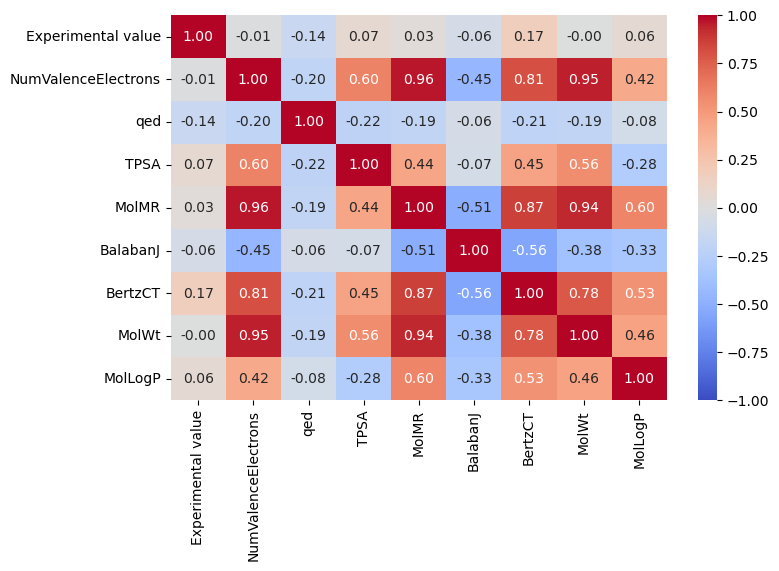

In [532]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)

In [533]:
features = file2.iloc[:,1:]     # Separating the features columns

In [534]:
target = file2['Experimental value']    # Separating the target column

In [535]:
target.value_counts()   # We have approximately equal number of 0s and 1s

Experimental value
1    3251
0    2513
Name: count, dtype: int64

##### Plotting the boxplot of all the features

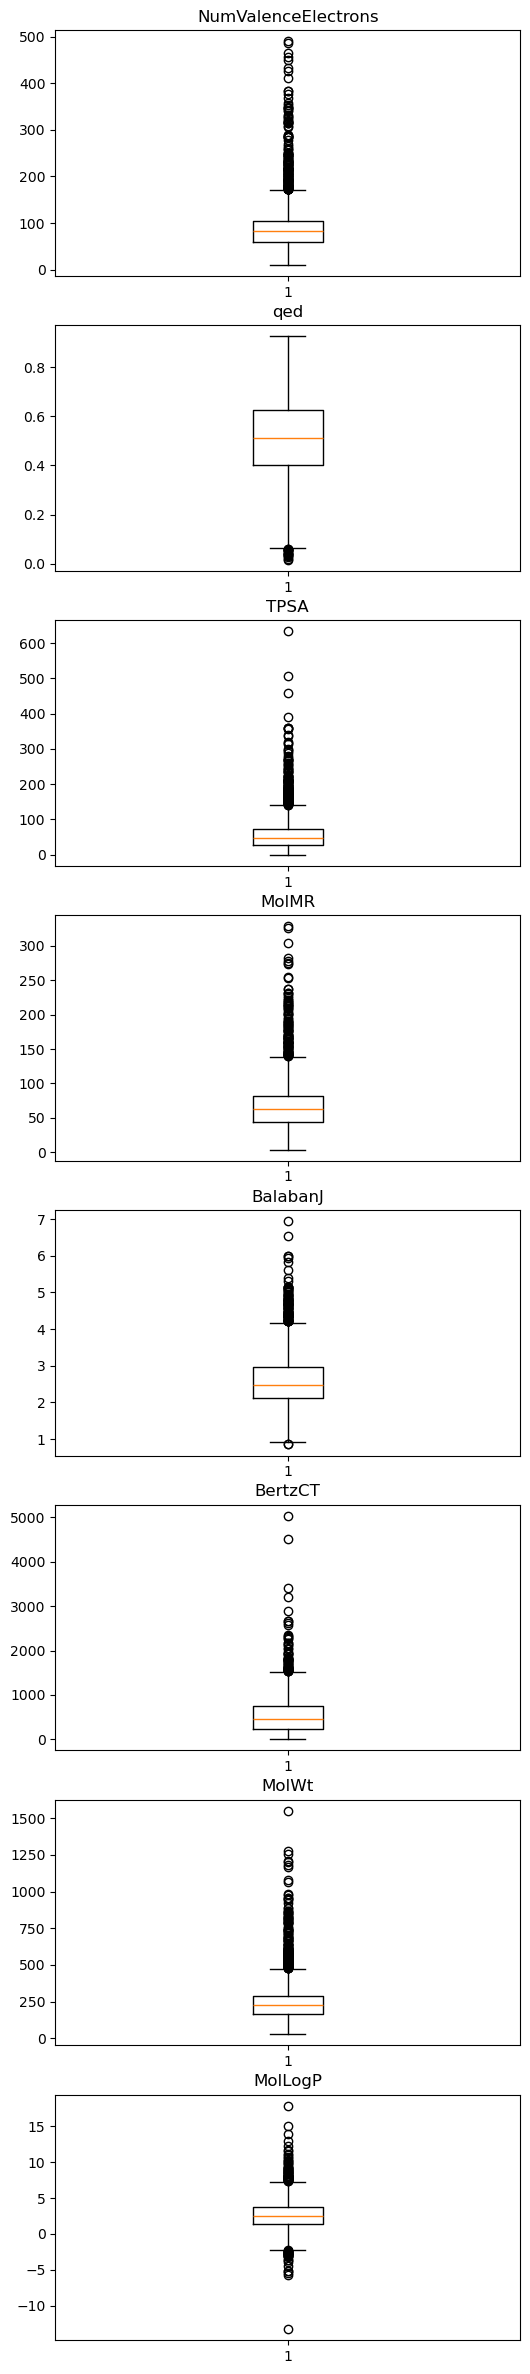

In [536]:
plt.figure(figsize=(6,30))
for i in range(0,len(features.columns)):
    plt.subplot(len(features.columns),1,i+1)
    plt.boxplot(features[features.columns[i]])
    plt.title(features.columns[i])

In [537]:
features.describe()

,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
count,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000
mean,86.975885,0.514007,53.769226,65.054749,2.573714,520.170632,241.124045,2.585628
std,42.616094,0.165847,43.060851,30.791044,0.640978,378.132827,116.086247,1.938946
min,10.000000,0.016502,0.000000,3.929500,0.854053,0.000000,28.010000,-13.262400
25%,60.000000,0.401531,26.020000,43.242600,2.131210,227.914524,165.171750,1.342550
50%,82.000000,0.513235,46.170000,62.158050,2.480737,460.103244,228.207000,2.463200
75%,104.000000,0.626174,72.322500,81.738375,2.953223,748.111589,290.531250,3.751620
max,490.000000,0.924384,633.360000,328.444600,6.947594,5033.685325,1550.188000,17.853900


In [538]:
file2.columns

Index(['Experimental value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')

### Feature Scaling

Since we have not removed the outliers so normal Quantile method will not work here hence we are using this 'RobustScaler()' class to scale our features.

In [539]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features))
features_scaled.columns = features.columns

In [540]:
features_scaled

,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,-0.681818,-0.220942,-0.065439,-0.624787,0.635834,-0.414600,-0.563587,-0.089246
1,-0.681818,-0.684157,0.496517,-0.640311,0.635834,-0.418444,-0.718581,-0.533899
2,-0.681818,-0.189220,0.371470,-0.711685,0.635834,-0.419896,-0.710732,-0.482676
3,-0.545455,-0.359009,-0.065439,-0.426817,0.526834,-0.389189,-0.097105,0.011000
4,-0.545455,-0.148903,-0.065439,-0.511320,0.526834,-0.397549,-0.614569,-0.127020
...,...,...,...,...,...,...,...,...
5759,0.454545,-0.125286,0.698882,0.186980,0.228409,0.321671,0.295646,-1.461435
5760,-0.909091,-0.076779,-0.628476,-0.565934,1.594112,-0.720260,0.693837,0.052759
5761,-0.863636,0.246260,-0.737325,-0.563707,-0.040467,-0.828979,0.021730,-0.455528
5762,2.318182,-1.106884,3.011069,1.641594,0.087881,1.363404,2.052098,0.574695


In [541]:
features_scaled.columns

Index(['NumValenceElectrons', 'qed', 'TPSA', 'MolMR', 'BalabanJ', 'BertzCT',
       'MolWt', 'MolLogP'],
      dtype='object')

We are not selecting 'NumValenceElectrons' as it was heavily correlated with 'MolMR' and 'MolWt' columns. And also we found that when 'BalabanJ' is dropped we are getting more accuracy.

In [542]:
X = features_scaled[['qed', 'TPSA', 'MolMR', 'BertzCT',
       'MolWt', 'MolLogP']]

In [543]:
Y = target

In [544]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Model training using KNN classifier

In [545]:
# Splitting the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [546]:
# Initialize the kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [547]:
# Predict the test data
y_pred = knn.predict(X_test)

In [548]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7173


### Hyper parameter tuning

In [549]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),              # k values from 1 to 30
    'metric': ['euclidean', 'manhattan'],     # Distance metrics
    'weights': ['uniform', 'distance'],       # Weighting schemes
    'p': [1, 2]                               # Power parameter for Minkowski distance
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Evaluate on test data
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Score: 0.71


## Performance Metrics

In [551]:
# Calculate and display the F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       503
           1       0.76      0.76      0.76       650

    accuracy                           0.73      1153
   macro avg       0.72      0.72      0.72      1153
weighted avg       0.73      0.73      0.73      1153



In [552]:
from sklearn.metrics import f1_score, confusion_matrix

In [553]:
# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score : {f1:.4f}")

F1-Score : 0.7602


Text(0.5, 1.0, 'Confusion Matrix')

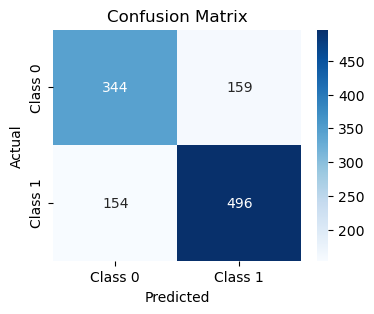

In [554]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')